In [150]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 6 - Logistic Regression\\bank-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [151]:
d = {'yes': 1, 'no': 0}
for i in ["default",'housing','loan','y']:
    df[i]=pd.DataFrame(df[i].map(d))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [152]:
DF = pd.get_dummies(df)
DF.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [153]:
# shift column 'Name' to first position
first_column = DF.pop('y')
  
# insert column using insert(position,column_name,
# first_column) function
DF.insert(0, 'y', first_column)
DF.head()

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,0,2143,1,0,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,0,44,0,29,1,0,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,0,33,0,2,1,1,5,76,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,0,47,0,1506,1,0,5,92,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,0,33,0,1,0,0,5,198,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [154]:
X=DF.iloc[:,1:]
Y=DF.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\shred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### classifier.coef_ for different columns

In [157]:
info={'classifier.coef_':pd.Series(classifier.coef_[0].round(3), index=DF.iloc[:,1:].columns)}
a=pd.DataFrame(info)
a

,classifier.coef_
age,-0.027
default,-0.020
balance,0.000
housing,-0.713
loan,-0.205
day,0.001
duration,0.004
campaign,-0.408
pdays,0.003
previous,-0.120


#### classifier.coef_ plots

<AxesSubplot:>

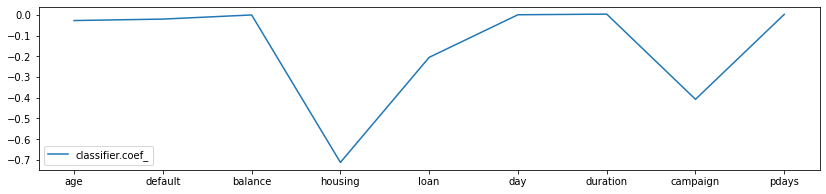

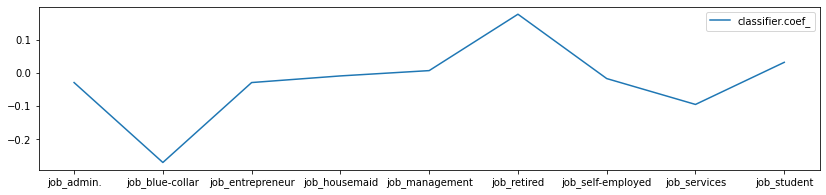

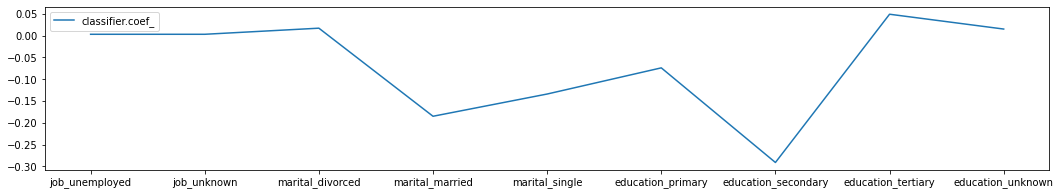

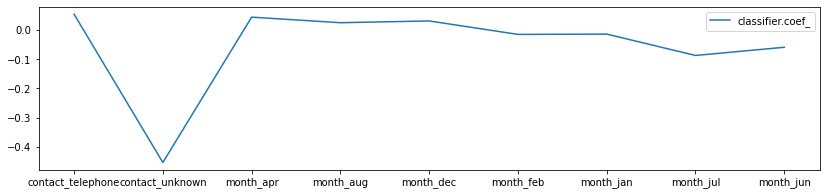

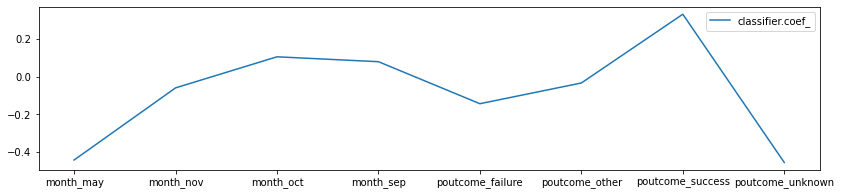

In [158]:
a[0:9].plot(figsize=(14,3))
a[10:19].plot(figsize=(14,3))
a[20:29].plot(figsize=(18,3))
a[30:39].plot(figsize=(14,3))
a[40:109].plot(figsize=(14,3))

#### sort classifier.coef_

In [166]:
a.sort_values('classifier.coef_',ascending=False).head()

,classifier.coef_
poutcome_success,0.331
job_retired,0.177
month_oct,0.105
contact_cellular,0.098
month_mar,0.092


In [168]:
a.sort_values('classifier.coef_',ascending=True).head(8)

,classifier.coef_
housing,-0.713
poutcome_unknown,-0.456
contact_unknown,-0.453
month_may,-0.443
campaign,-0.408
education_secondary,-0.291
job_blue-collar,-0.270
loan,-0.205


###### Interpretation
- If the client has housing loan, s/he has -0.713(fewer) chances to not subscribe to a term deposit.
- With a unit increase in campaigns, there is 0.408 times fewer chances to not subscribe to a term deposit.
- Blue-collar job-holders are are the least likely, 0.270 times less likely to not subscribe to a term deposit.
- Retired individuals are the most likely, 0.177 times more likely to subscribe to a term deposit.

In [170]:
classifier.intercept_

array([-0.3017474])

In [171]:
classifier.predict_proba(X)

array([[0.96639045, 0.03360955],
       [0.97910939, 0.02089061],
       [0.98304627, 0.01695373],
       ...,
       [0.35144632, 0.64855368],
       [0.93270522, 0.06729478],
       [0.86156125, 0.13843875]])

In [180]:
#Accuracy in terms of percentage
classifier.score(X,Y)

0.8915750591670168

In [174]:
#Predict for X dataset
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df[0:30]

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [175]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

[[39118   804]
 [ 4098  1191]]


In [178]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



0.6025225366435621


Text(0, 0.5, 'True Positive Rate')

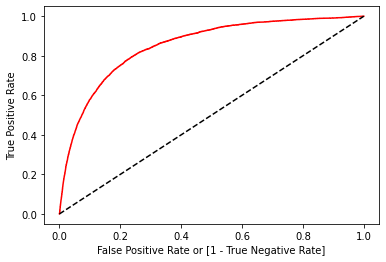

In [179]:
# ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### log_reg.summary()

In [182]:
import statsmodels.api as sm
X=DF.iloc[:,1:]
Y=DF.iloc[:,0]
log_reg = sm.Logit(Y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Tue, 08 Feb 2022   Pseudo R-squ.:                  0.3392
Time:                        14:48:14   Log-Likelihood:                -10781.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0001      0.002      0.051      0.959      -0.004       0.004
default                -0.0167      0.163     -0.102      0.918      -0.336       0.302
balance              1.284e-05   5.15e-06      2.493      0.013    2.75e-06    2.29e-05
housing                -0.6754      0.044    -15.395      0.000      -0.761      -0.589
loan                   -0.4254      0.060     -7.091      0.000      -0.543      -0.308
day                     0.0100      0.002      3.993      0.000       0.005       0.015
duration                0.0042   6.45e-05     64.985      0.000       0.004       0.004
campaign               -0.0908      0.010     -8.955      0.000      -0.111      -0.071
pdays                  -0.0001      0.000     -0.335      0.737      -0.001       0.000
previous                0.0102      0.007      1.561      0.118      -0.003       0.023
job_admin.              0.0019   1.06e+06   1.75e-09      1.000   -2.08e+06    2.08e+06
job_blue-collar        -0.3080   1.07e+06  -2.87e-07      1.000   -2.11e+06    2.11e+06
job_entrepreneur       -0.3552   1.08e+06   -3.3e-07      1.000   -2.11e+06    2.11e+06
job_housemaid          -0.5021   1.15e+06  -4.36e-07      1.000   -2.26e+06    2.26e+06
job_management         -0.1634   1.12e+06  -1.47e-07      1.000   -2.19e+06    2.19e+06
job_retired             0.2542   1.07e+06   2.38e-07      1.000    -2.1e+06     2.1e+06
job_self-employed      -0.2965    1.2e+06  -2.47e-07      1.000   -2.35e+06    2.35e+06
job_services           -0.2219   1.15e+06  -1.93e-07      1.000   -2.25e+06    2.25e+06
job_student             0.3840   1.06e+06   3.61e-07      1.000   -2.09e+06    2.09e+06
job_technician         -0.1742   1.26e+06  -1.39e-07      1.000   -2.46e+06    2.46e+06
job_unemployed         -0.1749   1.03e+06   -1.7e-07      1.000   -2.02e+06    2.02e+06
job_unknown            -0.3114    1.2e+06   -2.6e-07      1.000   -2.35e+06    2.35e+06
marital_divorced       -0.5935        nan        nan        nan         nan         nan
marital_married        -0.7730        nan        nan        nan         nan         nan
marital_single         -0.5010        nan        nan        nan         nan         nan
education_primary      -0.6701        nan        nan        nan         nan         nan
education_secondary    -0.4866        nan        nan        nan         nan         nan
education_tertiary     -0.2912        nan        nan        nan         nan         nan
education_unknown      -0.4196        nan        nan        nan         nan         nan
contact_cellular       -0.0270        nan        nan        nan         nan         nan
contact_telephone      -0.1904        nan        nan        nan         nan         nan
contact_unknown        -1.6502        nan        nan        nan         nan         nan
month_apr              -0.1793        nan        nan        nan         nan         nan
month_aug              -0.8732        nan        nan        nan         n